In [2]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [4]:
df.head()


,velocity,height
0,40,84.632653
1,40,85.632653
2,47,116.704082
3,3,-0.540816
4,36,69.122449


In [5]:
y=df.iloc[:,1]
print(y)
print(y.shape)

0      84.632653
1      85.632653
2     116.704082
3      -0.540816
4      69.122449
         ...    
94      4.836735
95     15.418367
96     -4.000000
97     45.908163
98      9.479592
Name: height, Length: 99, dtype: float64
(99,)


In [6]:
X=df.iloc[:,0]
print(X)
print(X.shape)
X=np.array(X)
X=X.reshape(-1,1)
print(X)

0     40
1     40
2     47
3      3
4     36
      ..
94     6
95    19
96     0
97    29
98    15
Name: velocity, Length: 99, dtype: int64
(99,)
[[40]
 [40]
 [47]
 [ 3]
 [36]
 [26]
 [11]
 [38]
 [33]
 [ 5]
 [19]
 [43]
 [45]
 [24]
 [40]
 [21]
 [13]
 [31]
 [15]
 [32]
 [28]
 [16]
 [17]
 [15]
 [47]
 [ 3]
 [ 2]
 [ 3]
 [25]
 [20]
 [ 9]
 [ 8]
 [27]
 [31]
 [44]
 [49]
 [22]
 [10]
 [49]
 [15]
 [ 8]
 [ 8]
 [ 8]
 [22]
 [28]
 [ 8]
 [23]
 [46]
 [28]
 [14]
 [50]
 [48]
 [19]
 [18]
 [37]
 [12]
 [ 9]
 [25]
 [38]
 [23]
 [ 2]
 [16]
 [30]
 [27]
 [47]
 [28]
 [49]
 [28]
 [48]
 [ 4]
 [48]
 [40]
 [31]
 [35]
 [44]
 [27]
 [41]
 [38]
 [ 8]
 [18]
 [19]
 [48]
 [26]
 [ 5]
 [25]
 [44]
 [22]
 [31]
 [ 7]
 [38]
 [12]
 [44]
 [37]
 [ 5]
 [ 6]
 [19]
 [ 0]
 [29]
 [15]]


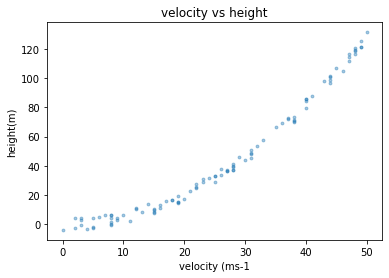

In [7]:
plt.scatter(X,y,marker="o",alpha=0.4,s=8)
plt.xlabel("velocity (ms-1")
plt.ylabel("height(m)")
plt.title("velocity vs height")
plt.show()

In [8]:
poly=PolynomialFeatures(degree=2)
xpoly=poly.fit_transform(X)

In [9]:
model = LinearRegression()
model.fit(xpoly, y)
ypoly_pred = model.predict(xpoly)
print(ypoly_pred)

[ 8.24142801e+01  8.24142801e+01  1.14066556e+02  3.12025179e-01
  6.66300391e+01  3.44964444e+01  5.92196568e+00  7.43128165e+01
  5.58909095e+01  1.08648108e+00  1.82308846e+01  9.53515119e+01
  1.04499691e+02  2.93257839e+01  8.24142801e+01  2.23548297e+01
  8.37116618e+00  4.92548475e+01  1.12390528e+01  5.25205428e+01
  4.00857910e+01  1.28300035e+01  1.45256256e+01  1.12390528e+01
  1.14066556e+02  3.12025179e-01  8.18045374e-02  3.12025179e-01
  3.18587784e+01  2.02405214e+01  3.89145132e+00  3.03320145e+00
  3.72387819e+01  4.92548475e+01  9.98732656e+01  1.24052107e+02
  2.45738096e+01  4.85437273e+00  1.24052107e+02  1.12390528e+01
  3.03320145e+00  3.03320145e+00  3.03320145e+00  2.45738096e+01
  4.00857910e+01  3.03320145e+00  2.68974610e+01  1.09230788e+02
  4.00857910e+01  9.75277374e+00  1.29201890e+02  1.19006996e+02
  1.82308846e+01  1.63259193e+01  7.04190920e+01  7.09423016e+00
  3.89145132e+00  3.18587784e+01  7.43128165e+01  2.68974610e+01
  8.18045374e-02  1.28300

In [10]:
r2 = r2_score(y,ypoly_pred)
print(r2)
rmse = np.sqrt(mean_squared_error(y,ypoly_pred))
r2 = r2_score(y,ypoly_pred)
print(rmse)
print(r2)

0.9960414617792925
2.5323420788033904
0.9960414617792925


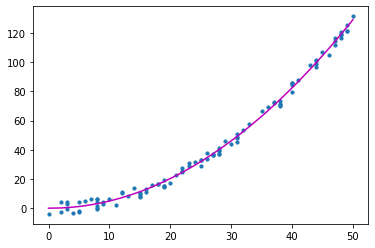

In [11]:
plt.scatter(X, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,ypoly_pred), key=sort_axis)
X, ypoly_pred = zip(*sorted_zip)
plt.plot(X, ypoly_pred, color='m')
plt.show()

In [19]:
a=[[23],[6],[67],[84],[16]]
ab=model.predict(poly.fit_transform(a))
ab

array([ 26.89746097,   1.63071633, 232.76294506, 366.5740745 ,
        12.83000347])

In [27]:
a=np.array(a)
cd=a**2/19.
cd=cd.flatten()
cd

array([ 27.84210526,   1.89473684, 236.26315789, 371.36842105,
        13.47368421])

In [29]:
(ab/cd)*100

array([96.60713769, 86.06558413, 98.51851094, 98.70900532, 95.22268198])